In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

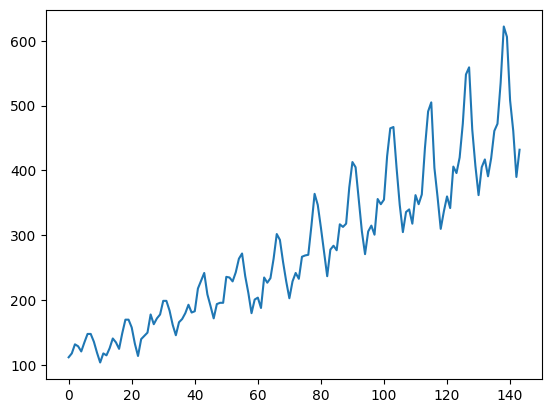

In [2]:
#load the dataset
training_set = pd.read_csv('../data/airline-passengers.csv')
training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Airlines Data')
plt.show()

In [3]:
'''
***Explain*** What is the sliding_windows function doing here?, and what does the seq_length value mean?
'''

seq_length = 5

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)



sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Model

In [4]:
# Define the LSTM Network
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        '''
        ***Explain*** Why do we need h_0 and c_0?
        '''
        
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

## Training

In [11]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

'''
***Explain*** Why are the input size and the num_classes equal to one?, should not it be input_size = seq_length? 
'''

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0 or epoch==0:
      print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

Epoch: 1, loss: 0.90484
Epoch: 100, loss: 0.01144
Epoch: 200, loss: 0.00463
Epoch: 300, loss: 0.00304
Epoch: 400, loss: 0.00287
Epoch: 500, loss: 0.00271
Epoch: 600, loss: 0.00257
Epoch: 700, loss: 0.00245
Epoch: 800, loss: 0.00233
Epoch: 900, loss: 0.00222
Epoch: 1000, loss: 0.00213
Epoch: 1100, loss: 0.00204
Epoch: 1200, loss: 0.00196
Epoch: 1300, loss: 0.00189
Epoch: 1400, loss: 0.00183
Epoch: 1500, loss: 0.00178
Epoch: 1600, loss: 0.00174
Epoch: 1700, loss: 0.00170
Epoch: 1800, loss: 0.00168
Epoch: 1900, loss: 0.00165
Epoch: 2000, loss: 0.00164


## Testing for Airplane Passengers Dataset

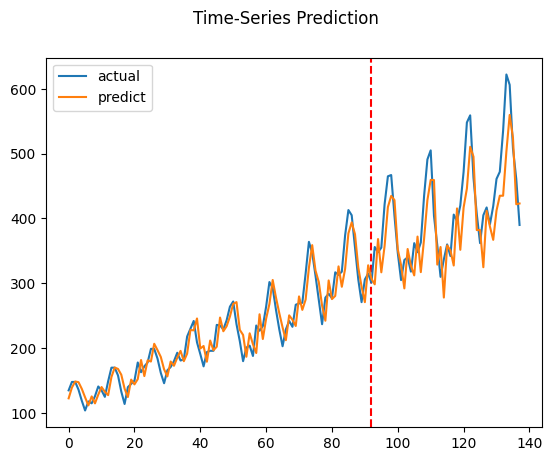

In [12]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, label="actual")
plt.plot(data_predict, label="prediction")
plt.suptitle('Time-Series Prediction')
plt.legend()
plt.show()

In [13]:
'''
***Explain*** Rerun your model with 5000 epochs. Do you notice something strange? If yes, provide an explanation.
'''
# Rerunning with 5000 epochs
num_epochs = 5000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0 or epoch==0:
      print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

Epoch: 1, loss: 0.01203
Epoch: 100, loss: 0.00328
Epoch: 200, loss: 0.00230
Epoch: 300, loss: 0.00184
Epoch: 400, loss: 0.00165
Epoch: 500, loss: 0.00164
Epoch: 600, loss: 0.00164
Epoch: 700, loss: 0.00163
Epoch: 800, loss: 0.00161
Epoch: 900, loss: 0.00159
Epoch: 1000, loss: 0.00157
Epoch: 1100, loss: 0.00154
Epoch: 1200, loss: 0.00153
Epoch: 1300, loss: 0.00152
Epoch: 1400, loss: 0.00150
Epoch: 1500, loss: 0.00149
Epoch: 1600, loss: 0.00148
Epoch: 1700, loss: 0.00147
Epoch: 1800, loss: 0.00145
Epoch: 1900, loss: 0.00144
Epoch: 2000, loss: 0.00143
Epoch: 2100, loss: 0.00142
Epoch: 2200, loss: 0.00140
Epoch: 2300, loss: 0.00139
Epoch: 2400, loss: 0.00137
Epoch: 2500, loss: 0.00136
Epoch: 2600, loss: 0.00134
Epoch: 2700, loss: 0.00132
Epoch: 2800, loss: 0.00130
Epoch: 2900, loss: 0.00127
Epoch: 3000, loss: 0.00126
Epoch: 3100, loss: 0.00124
Epoch: 3200, loss: 0.00123
Epoch: 3300, loss: 0.00122
Epoch: 3400, loss: 0.00122
Epoch: 3500, loss: 0.00121
Epoch: 3600, loss: 0.00121
Epoch: 3700, 

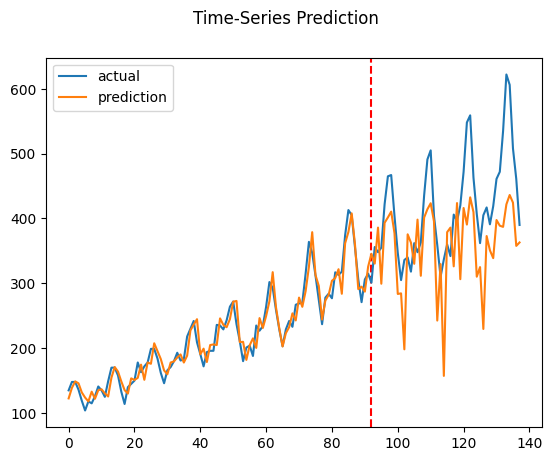

In [14]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, label="actual")
plt.plot(data_predict, label="prediction")
plt.suptitle('Time-Series Prediction')
plt.legend()
plt.show()

In [16]:
'''
Implement MSE calculation for the test data
'''
test_criterion = nn.MSELoss()
test_pred = lstm(testX)
test_loss = test_criterion(test_pred, testY)
print(f"Test MSE: {test_loss.item():.5f}")

Test MSE: 0.02830
